# Install imageio package

In [ ]:
! pip install imageio

# Load the dependencies

In [ ]:
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

##Load the image from url

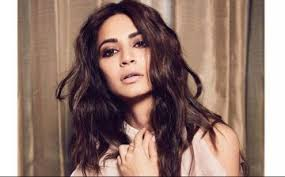

In [32]:
img = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTBUfXCb5x1nnlm62nQChMDRJRrRG9qVIQCMw&usqp=CAU"
dp.Image(requests.get(img).content)

# Read the image

In [33]:
source_img = imageio.imread(img)

In [34]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

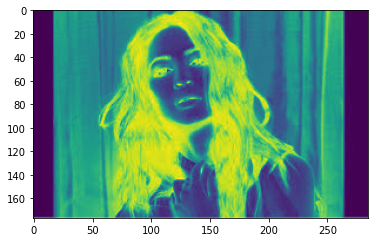

In [35]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

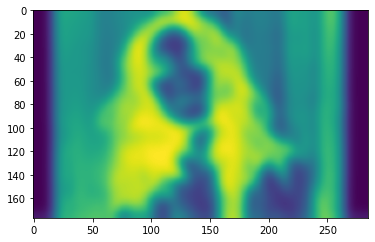

In [36]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [37]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [38]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


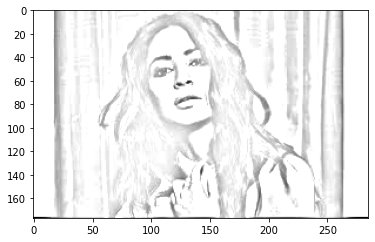

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [40]:
#Save the image
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)